# **Messy_data science project by samisamuel (data cleaning)**

In [ ]:
import pandas as pd
messy_d = pd.read_csv('/content/sample_data/messy_data.csv')

In [ ]:
messy_d

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,03/17/2026,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,26-01-2035,741,1040,Book J,18,193.27,4386.52,debit card,69
2,2123,05/26/2035,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,28-02-2036,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,19-04-2023,123,1058,Book B,15,33.63,2578.19,Cash,-1
...,...,...,...,...,...,...,...,...,...,...
10095,5735,04/03/2027,52,1066,Book G,1,191.41,2788.25,Credit Card,91
10096,5192,08/16/2025,334,1093,Bok N,-2,186.16,1187.53,paypal,50
10097,5391,06/18/2026,657,1047,Bookk H,5,84.38,2119.76,debit card,63
10098,861,04/08/2034,579,1014,Bok N,19,137.58,1708.87,Debit,-7


In [ ]:
type(messy_d)

pandas.core.frame.DataFrame

In [ ]:
messy_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TrnsnID      10100 non-null  int64  
 1   Data         10100 non-null  object 
 2   CusmrID      10100 non-null  int64  
 3   ProdtID      10100 non-null  int64  
 4   ProdtName    9098 non-null   object 
 5   Qutity       10100 non-null  int64  
 6   Prize        10100 non-null  float64
 7   TtlSales     10100 non-null  float64
 8   PaymentType  8645 non-null   object 
 9   CusterAge    10100 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 789.2+ KB


# **General Dataset Cleaning**


# **1. Duplicate record: check for and remove any duplicate rows.**




In [ ]:
messy_d.head()

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,03/17/2026,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,26-01-2035,741,1040,Book J,18,193.27,4386.52,debit card,69
2,2123,05/26/2035,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,28-02-2036,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,19-04-2023,123,1058,Book B,15,33.63,2578.19,Cash,-1


In [ ]:
messy_d.shape

(10100, 10)

In [ ]:
#find duplicate values
messy_d['CusmrID'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10095     True
10096     True
10097     True
10098     True
10099     True
Name: CusmrID, Length: 10100, dtype: bool

The 'cusmrID' will be used to fillter the data frame for duplicate because each person has a unique ID, therefore, the perfect way to filter the data is by using the 'cusmrID'

In [ ]:
#value_count for duplicate and non duplicate
messy_d['CusmrID'].duplicated().value_counts()

True     9101
False     999
Name: CusmrID, dtype: int64

In [ ]:
#to further confirm lets check for unique values
messy_d.CusmrID.unique()

array([991, 741, 933, 641, 123, 185, 571, 172, 342, 614, 755, 361, 626,
       850, 559, 583, 643, 180, 462, 523, 480, 632, 987, 113, 980, 546,
       566, 653, 307,  59, 294, 851, 963, 730, 538, 295, 815, 241, 382,
       849, 622,  72, 217, 794, 243, 386,  10, 372, 887, 897, 926, 310,
       691, 268, 259, 138, 437, 423, 512, 695, 117, 871, 279, 167, 304,
       841, 483, 747,  86, 579, 297, 839, 828, 904, 676, 420, 287,  65,
       953,  13, 986, 698, 770, 777, 218, 425, 911, 112, 145,  93, 956,
       806, 994, 647, 376, 625, 638, 568, 533, 718, 658, 522, 327, 231,
       562, 840, 381,  43,  47, 760,  96, 912, 599, 136, 985, 735, 545,
       761, 646, 782, 970, 796, 661, 461, 896, 928, 965, 858, 414,  31,
        58, 336, 252, 286, 831, 463,  80,  16, 540, 903, 468, 339, 283,
       348, 742, 877, 859, 870, 738, 949, 952, 637,  39, 290, 232, 466,
       672, 750,  44, 557,  26,  70, 836, 214,  95, 328, 165, 910, 711,
       368, 179, 459, 612, 908, 940, 364, 602, 890, 659, 170, 34

In [ ]:
#to further confirm lets check for number of unique values
messy_d.CusmrID.nunique()

999

In [ ]:
#sum of duplicated values
messy_d['CusmrID'].duplicated().sum()

9101

In [ ]:
#locating the duplicated rows
messy_d.loc[messy_d['CusmrID'].duplicated(),:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9101 entries, 47 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TrnsnID      9101 non-null   int64  
 1   Data         9101 non-null   object 
 2   CusmrID      9101 non-null   int64  
 3   ProdtID      9101 non-null   int64  
 4   ProdtName    8180 non-null   object 
 5   Qutity       9101 non-null   int64  
 6   Prize        9101 non-null   float64
 7   TtlSales     9101 non-null   float64
 8   PaymentType  7774 non-null   object 
 9   CusterAge    9101 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 782.1+ KB


In [ ]:
#locating the duplicated rows
messy_d.loc[messy_d['CusmrID'].duplicated(),:]

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
47,2376,17-12-2023,243,1075,Book R,-2,191.13,1900.42,Credit,-10
50,316,02/14/2028,566,1012,Bookk H,-1,185.04,4526.58,Credit,99
70,736,06-04-2029,741,1095,Book D,13,181.79,2136.45,NaN,58
82,8674,01/06/2024,643,1033,Bok N,12,160.25,4244.64,debit card,74
89,8292,10/09/2025,372,1038,NaN,-2,177.28,4600.37,debit card,24
...,...,...,...,...,...,...,...,...,...,...
10095,5735,04/03/2027,52,1066,Book G,1,191.41,2788.25,Credit Card,91
10096,5192,08/16/2025,334,1093,Bok N,-2,186.16,1187.53,paypal,50
10097,5391,06/18/2026,657,1047,Bookk H,5,84.38,2119.76,debit card,63
10098,861,04/08/2034,579,1014,Bok N,19,137.58,1708.87,Debit,-7


In [ ]:
#dropping the duplicated values
messy_d.drop_duplicates()

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,03/17/2026,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,26-01-2035,741,1040,Book J,18,193.27,4386.52,debit card,69
2,2123,05/26/2035,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,28-02-2036,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,19-04-2023,123,1058,Book B,15,33.63,2578.19,Cash,-1
...,...,...,...,...,...,...,...,...,...,...
10095,5735,04/03/2027,52,1066,Book G,1,191.41,2788.25,Credit Card,91
10096,5192,08/16/2025,334,1093,Bok N,-2,186.16,1187.53,paypal,50
10097,5391,06/18/2026,657,1047,Bookk H,5,84.38,2119.76,debit card,63
10098,861,04/08/2034,579,1014,Bok N,19,137.58,1708.87,Debit,-7


In [ ]:
#Effecting the changes in the datafram
messy_d.drop_duplicates(inplace = True)
messy_d

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,03/17/2026,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,26-01-2035,741,1040,Book J,18,193.27,4386.52,debit card,69
2,2123,05/26/2035,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,28-02-2036,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,19-04-2023,123,1058,Book B,15,33.63,2578.19,Cash,-1
...,...,...,...,...,...,...,...,...,...,...
10095,5735,04/03/2027,52,1066,Book G,1,191.41,2788.25,Credit Card,91
10096,5192,08/16/2025,334,1093,Bok N,-2,186.16,1187.53,paypal,50
10097,5391,06/18/2026,657,1047,Bookk H,5,84.38,2119.76,debit card,63
10098,861,04/08/2034,579,1014,Bok N,19,137.58,1708.87,Debit,-7


In [ ]:
messy_d.shape

(10000, 10)

# **2. Check out for Missing Values**

In [ ]:
#lets check for missing values
messy_d.isnull()

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10095,False,False,False,False,False,False,False,False,False,False
10096,False,False,False,False,False,False,False,False,False,False
10097,False,False,False,False,False,False,False,False,False,False
10098,False,False,False,False,False,False,False,False,False,False


In [ ]:
#lets check for the sum of missing values
messy_d.isnull().sum()

TrnsnID           0
Data              0
CusmrID           0
ProdtID           0
ProdtName       994
Qutity            0
Prize             0
TtlSales          0
PaymentType    1439
CusterAge         0
dtype: int64

In [ ]:
#checking for total sum of the missing values
messy_d.isnull().sum().sum()

2433

# **3. Ensuring all dates are in a consistent format**

In [ ]:
#check the data_type of date column
type('Data')

str

In [ ]:
messy_d['Data'] = messy_d['Data'].str.replace('-','/')

In [ ]:
#lets call the Date column
messy_d['Data']

0        03/17/2026
1        26/01/2035
2        05/26/2035
3        28/02/2036
4        19/04/2023
            ...    
10095    04/03/2027
10096    08/16/2025
10097    06/18/2026
10098    04/08/2034
10099    26/04/2029
Name: Data, Length: 10000, dtype: object

In [ ]:
#checking the data type
messy_d['Data'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10099
Series name: Data
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 156.2+ KB


In [ ]:
#changing the data type
messy_d['Data'] = pd.to_datetime(messy_d['Data'] )
messy_d['Data']

<ipython-input-27-028ed9690594>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  messy_d['Data'] = pd.to_datetime(messy_d['Data'] )


0       2026-03-17
1       2035-01-26
2       2035-05-26
3       2036-02-28
4       2023-04-19
           ...    
10095   2027-04-03
10096   2025-08-16
10097   2026-06-18
10098   2034-04-08
10099   2029-04-26
Name: Data, Length: 10000, dtype: datetime64[ns]

In [ ]:
#checking the info
messy_d['Data'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10099
Series name: Data
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.2 KB


In [ ]:
#checking the data
messy_d.head()

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,2026-03-17,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,2035-01-26,741,1040,Book J,18,193.27,4386.52,debit card,69
2,2123,2035-05-26,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,2036-02-28,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,2023-04-19,123,1058,Book B,15,33.63,2578.19,Cash,-1


# **4. standardising the payment type name**

In [ ]:
#Value count for payment type
messy_d['PaymentType'].value_counts()

Debit          1452
Credit         1433
Cash           1426
Credit Card    1419
debit card     1417
paypal         1414
Name: PaymentType, dtype: int64

In [ ]:
#checking for unique values
messy_d['PaymentType'].unique()

array([nan, 'debit card', 'Cash', 'Debit', 'Credit', 'Credit Card',
       'paypal'], dtype=object)

In [ ]:
#making the entries in the payment type consistent
messy_d['PaymentType'] = messy_d['PaymentType'].replace({'debit card':'Debit Card','Debit':'Debit Card','paypal':'Paypal','Credit':'Credit Card' })
messy_d.head()

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,2026-03-17,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,2035-01-26,741,1040,Book J,18,193.27,4386.52,Debit Card,69
2,2123,2035-05-26,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,2036-02-28,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,2023-04-19,123,1058,Book B,15,33.63,2578.19,Cash,-1


# **5. Handling negative values**

**a. 'CusterAge'**

In [ ]:
messy_d['CusterAge'].info()


<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10099
Series name: CusterAge
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 156.2 KB


In [ ]:
#identifying negative numbers
messy_d['CusterAge'][messy_d['CusterAge'] < 0]

4        -1
6        -4
30       -8
32       -1
47      -10
         ..
10065    -5
10068    -4
10075    -7
10080    -1
10098    -7
Name: CusterAge, Length: 974, dtype: int64

In [ ]:
#dealing with negative values by converting the data type to an object so as to deal with the - sign as a str or object
messy_d['CusterAge'] = messy_d['CusterAge'].astype(str)

In [ ]:
#calling this to be sure the data type has been changed
messy_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TrnsnID      10000 non-null  int64         
 1   Data         10000 non-null  datetime64[ns]
 2   CusmrID      10000 non-null  int64         
 3   ProdtID      10000 non-null  int64         
 4   ProdtName    9006 non-null   object        
 5   Qutity       10000 non-null  int64         
 6   Prize        10000 non-null  float64       
 7   TtlSales     10000 non-null  float64       
 8   PaymentType  8561 non-null   object        
 9   CusterAge    10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 859.4+ KB


In [ ]:
 #using the str.strip method to remove the - after it has been converted to a str or object
 messy_d['CusterAge'] = messy_d['CusterAge'].str.strip('-')
 messy_d['CusterAge']

0        87
1        69
2        15
3        22
4         1
         ..
10095    91
10096    50
10097    63
10098     7
10099    77
Name: CusterAge, Length: 10000, dtype: object

In [ ]:
#after the - sign is removed it isnow converted back to an int
messy_d['CusterAge'] = messy_d['CusterAge'].astype(int)
messy_d['CusterAge']

0        87
1        69
2        15
3        22
4         1
         ..
10095    91
10096    50
10097    63
10098     7
10099    77
Name: CusterAge, Length: 10000, dtype: int64

In [ ]:
#checking the value counts for the negative values
messy_d['CusterAge'][messy_d['CusterAge'] < 0].value_counts()

Series([], Name: CusterAge, dtype: int64)

In [ ]:
#checking the agregate of the negagtive values
Negative_values = messy_d['CusterAge'][messy_d['CusterAge'] < 0].value_counts().sum()
Negative_values

0

In [ ]:
#it was discovered that the costerAge is < 18 which is not logical so i will assign a random number between 18 and 30
#len(messy_d['CusterAge'][messy_d['CusterAge'] < 18])

In [ ]:
#solving the negative values issue
#import numpy as np

In [ ]:
#the code deal with all abnormal values and the negative entries
#int_number = np.random.randint(18,31,size = 2561)
#int_number

In [ ]:
 #sending the array of numbers to the custerAge roundomly such that the min age will be 18
 #messy_d['CusterAge'][messy_d['CusterAge'] < 18] = int_number
 #messy_d

In [ ]:
 #checking for number less than 18 in which negative value is part of
 #messy_d['CusterAge'][messy_d['CusterAge'] < 18].value_counts().sum()

In [ ]:
#checking for minimum value
messy_d['CusterAge'].min()

0

In [ ]:
#checking for maximum value
messy_d['CusterAge'].max()

99

**b. "Qutity'**

In [ ]:
#checking for the values less than 0
messy_d['Qutity'][messy_d['Qutity'] < 0]

26      -4
35      -4
47      -2
50      -1
51      -3
        ..
10075   -5
10088   -5
10093   -3
10094   -2
10096   -2
Name: Qutity, Length: 1939, dtype: int64

In [ ]:
messy_d['Qutity'][messy_d['Qutity'] < 0].value_counts().sum()

1939

In [ ]:
messy_d['Qutity'] = messy_d['Qutity'].astype(str)
messy_d['Qutity']

0         9
1        18
2         5
3         6
4        15
         ..
10095     1
10096    -2
10097     5
10098    19
10099    10
Name: Qutity, Length: 10000, dtype: object

In [ ]:
messy_d['Qutity'] = messy_d['Qutity'].str.strip('-')
messy_d['Qutity']

0         9
1        18
2         5
3         6
4        15
         ..
10095     1
10096     2
10097     5
10098    19
10099    10
Name: Qutity, Length: 10000, dtype: object

In [ ]:
messy_d['Qutity'] = messy_d['Qutity'].astype(int)
messy_d['Qutity']

0         9
1        18
2         5
3         6
4        15
         ..
10095     1
10096     2
10097     5
10098    19
10099    10
Name: Qutity, Length: 10000, dtype: int64

In [ ]:
#checking for the values greater than 0
messy_d['Qutity'][messy_d['Qutity'] > 0]

0         9
1        18
2         5
3         6
4        15
         ..
10095     1
10096     2
10097     5
10098    19
10099    10
Name: Qutity, Length: 9553, dtype: int64

In [ ]:
#checking for the values less than 0
messy_d['Qutity'].min()

0

In [ ]:
#checking for the values less than 0
messy_d['Qutity'].max()


19

In [ ]:
#calling the unique numbers for clarity
messy_d['Qutity'].unique()

array([ 9, 18,  5,  6, 15, 12, 11, 19, 14,  1, 10, 13,  8, 17,  2,  4,  7,
        3, 16,  0])

In [ ]:
#filling_num = np.random.randint(1,2,size=1939)
#filling_num

In [ ]:
#it is not logical for a customer to buy negative quantity of goods
#therefore i am giving at least 1 quantity
#thus all negative values will be filled with 1
#messy_d['Qutity'][messy_d['Qutity'] < 0]= filling_num

# **6. Dealing with unrealistic values**

In [ ]:
#calling the heading to deal with Ttlsales
messy_d.head()

,TrnsnID,Data,CusmrID,ProdtID,ProdtName,Qutity,Prize,TtlSales,PaymentType,CusterAge
0,7402,2026-03-17,991,1045,Boo E,9,167.72,2935.06,NaN,87
1,5835,2035-01-26,741,1040,Book J,18,193.27,4386.52,Debit Card,69
2,2123,2035-05-26,933,1062,Bok N,5,126.39,1948.46,Cash,15
3,8789,2036-02-28,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,2023-04-19,123,1058,Book B,15,33.63,2578.19,Cash,1


In [ ]:
#checking the data type
messy_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TrnsnID      10000 non-null  int64         
 1   Data         10000 non-null  datetime64[ns]
 2   CusmrID      10000 non-null  int64         
 3   ProdtID      10000 non-null  int64         
 4   ProdtName    9006 non-null   object        
 5   Qutity       10000 non-null  int64         
 6   Prize        10000 non-null  float64       
 7   TtlSales     10000 non-null  float64       
 8   PaymentType  8561 non-null   object        
 9   CusterAge    10000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
#creating a function because 'qutity' multiply by 'prize' should give 'TtlSales'
f = messy_d['Qutity']
s = messy_d['Prize']

In [ ]:
def add(x,y):
  d=x*y
  return d

In [ ]:
add(f,s)==messy_d['TtlSales']

0        False
1        False
2        False
3        False
4        False
         ...  
10095    False
10096    False
10097    False
10098    False
10099    False
Length: 10000, dtype: bool

In [ ]:
#trying to check the lent of the faulse value and it shows that the whole column is not correct
len(add(f,s)==messy_d['TtlSales'])

10000

# **7. Typos and Textual errors**

In [ ]:
#Here is the typos and textual errors located
messy_d['ProdtName'].unique()

array(['Boo E', 'Book J', 'Bok N', 'Book I', 'Book B', 'Book D', 'Book P',
       'Book M', 'Book O', 'Book T', 'Book A', nan, 'Book G', 'Book R',
       'Book L', 'Book K', 'Book F', 'Bookk H', 'Book S'], dtype=object)

# **8. Correcting typos in ProdtName**

In [ ]:
#Correcting the typos in prodtName and storing it by passing it to its self
messy_d['ProdtName'] = messy_d['ProdtName'].replace({'Boo E': 'Book E', 'Bok N':'Book N', 'Bookk H':'Book H' })
messy_d['ProdtName']

0        Book E
1        Book J
2        Book N
3        Book I
4        Book B
          ...  
10095    Book G
10096    Book N
10097    Book H
10098    Book N
10099    Book T
Name: ProdtName, Length: 10000, dtype: object

In [ ]:
#To be sure of the entries in this column
messy_d['ProdtName'].unique()

array(['Book E', 'Book J', 'Book N', 'Book I', 'Book B', 'Book D',
       'Book P', 'Book M', 'Book O', 'Book T', 'Book A', nan, 'Book G',
       'Book R', 'Book L', 'Book K', 'Book F', 'Book H', 'Book S'],
      dtype=object)

# **9. Data type of each column which is not involved in calculation must be an object**





In [ ]:
#calling the column to check the data type
messy_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TrnsnID      10000 non-null  int64         
 1   Data         10000 non-null  datetime64[ns]
 2   CusmrID      10000 non-null  int64         
 3   ProdtID      10000 non-null  int64         
 4   ProdtName    9006 non-null   object        
 5   Qutity       10000 non-null  int64         
 6   Prize        10000 non-null  float64       
 7   TtlSales     10000 non-null  float64       
 8   PaymentType  8561 non-null   object        
 9   CusterAge    10000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
#lets start casting easch of them (for cusmrID)
messy_d['CusmrID'] = messy_d['CusmrID'].astype(object)
messy_d['CusmrID']

0        991
1        741
2        933
3        641
4        123
        ... 
10095     52
10096    334
10097    657
10098    579
10099    153
Name: CusmrID, Length: 10000, dtype: object

In [ ]:
# for TrnsnID
messy_d['TrnsnID'] = messy_d['TrnsnID'].astype(object)
messy_d['TrnsnID']

0        7402
1        5835
2        2123
3        8789
4         305
         ... 
10095    5735
10096    5192
10097    5391
10098     861
10099    7271
Name: TrnsnID, Length: 10000, dtype: object

In [ ]:
#for ProdtID
messy_d['ProdtID'] = messy_d['ProdtID'].astype(object)
messy_d['ProdtID']

0        1045
1        1040
2        1062
3        1060
4        1058
         ... 
10095    1066
10096    1093
10097    1047
10098    1014
10099    1052
Name: ProdtID, Length: 10000, dtype: object

In [ ]:
# for CusterAge
messy_d['CusterAge'] = messy_d['CusterAge'].astype(object)
messy_d['CusterAge']

0        87
1        69
2        15
3        22
4         1
         ..
10095    91
10096    50
10097    63
10098     7
10099    77
Name: CusterAge, Length: 10000, dtype: object

In [ ]:
#checking if the datatpe have been changed in the dataFrame
messy_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TrnsnID      10000 non-null  object        
 1   Data         10000 non-null  datetime64[ns]
 2   CusmrID      10000 non-null  object        
 3   ProdtID      10000 non-null  object        
 4   ProdtName    9006 non-null   object        
 5   Qutity       10000 non-null  int64         
 6   Prize        10000 non-null  float64       
 7   TtlSales     10000 non-null  float64       
 8   PaymentType  8561 non-null   object        
 9   CusterAge    10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.1+ MB


# **10. Correct the entry column name that are spelt wrongly**

In [ ]:
#calling the dataFrame to see the column with default
messy_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TrnsnID      10000 non-null  object        
 1   Data         10000 non-null  datetime64[ns]
 2   CusmrID      10000 non-null  object        
 3   ProdtID      10000 non-null  object        
 4   ProdtName    9006 non-null   object        
 5   Qutity       10000 non-null  int64         
 6   Prize        10000 non-null  float64       
 7   TtlSales     10000 non-null  float64       
 8   PaymentType  8561 non-null   object        
 9   CusterAge    10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
#Using the rename function to correct the column with wrong spelling
messy_d = messy_d.rename(columns = {'TrnsnID':'TransactionID','Data':'Date','CusmrID':'customerID',
                                    'ProdtID':'ProductID','ProdtName':'ProductName', 'Qutity':'Quantity',
                                    'Prize':'Price','TtlSales':'TotalSales','CusterAge':'CustomerAge'})


In [ ]:
#checking if it has been corrected
messy_d.head()

,TransactionID,Date,customerID,ProductID,ProductName,Quantity,Price,TotalSales,PaymentType,CustomerAge
0,7402,2026-03-17,991,1045,Book E,9,167.72,2935.06,NaN,87
1,5835,2035-01-26,741,1040,Book J,18,193.27,4386.52,Debit Card,69
2,2123,2035-05-26,933,1062,Book N,5,126.39,1948.46,Cash,15
3,8789,2036-02-28,641,1060,Book I,6,66.98,1757.26,Cash,22
4,305,2023-04-19,123,1058,Book B,15,33.63,2578.19,Cash,1


# **THE END OF THE PROJECT ON DATA CLEANING**
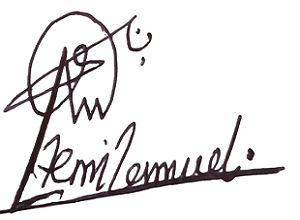
**Project by Ayodele Femi Samuel**